# AP156 Week 6 (12 Sep 18)

Domingo, Kenneth V.<br />
2015-03116

Primary references:
1. Kinzel, W., and G. Reents (1998). Population dynamics. In M. Clajus, and B. Freeland-Clajus (Trans.), <i>Physics by computer: Programming physical problems using Mathematica and C</i> (pp. 81-92). New York: Springer (Original work published 1996).

In [21]:
import numpy as np
import matplotlib.pyplot as mp
import scipy.optimize as spo

%matplotlib inline
mp.rc("text", usetex=True)

In [22]:
x = [0.65]
r = 0.87
for n in range(1,43):
    x.append(4*r*x[n-1]*(1-x[n-1]))

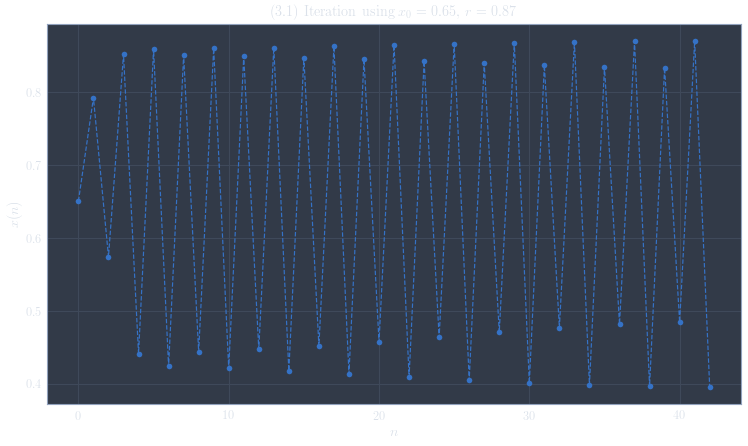

In [23]:
mp.figure(figsize=(7*16/9,7))
mp.plot(x,"bo")
mp.plot(x,"b--")
mp.xlabel(r"$n$")
mp.ylabel(r"$x(n)$")
mp.title(r"\textrm{(3.1) Iteration using $x_0 =$ %.2f, $r =$ %.2f}"%(x[0],r))
mp.show()

In [160]:
def f(x):
    return 4*r*x*(1 - x)

def df(x):
    return 4*r*(1 - 2*x)

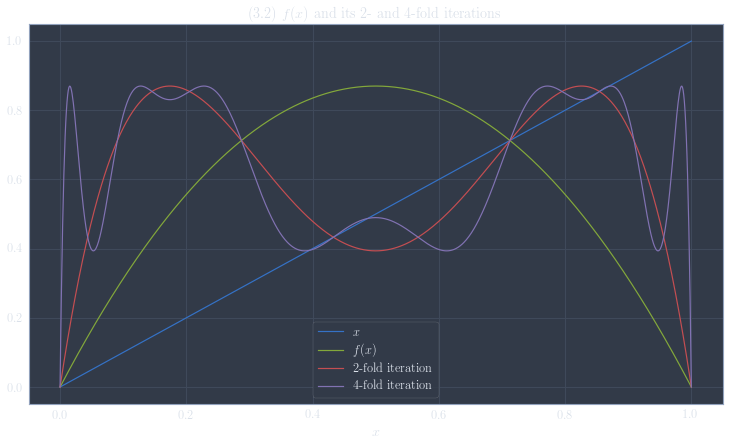

In [25]:
x = np.linspace(0,1,1000)
mp.figure(figsize=(7*16/9,7))

mp.plot(x,x, label=r"$x$")
mp.plot(x,f(x), label=r"$f(x)$")
mp.plot(x,f(f(x)), label=r"\textrm{2-fold iteration}")
mp.plot(x,f(f(f(f(x)))), label=r"\textrm{4-fold iteration}")

mp.xlabel(r"$x$")
mp.title(r"\textrm{(3.2) $f(x)$ and its 2- and 4-fold iterations}")
mp.legend()
mp.show()

In [152]:
r = np.linspace(0,1,1000)
xn = []
for R in r:
    x = np.zeros(1100)
    x[0] = 0.5
    for i in range(1,1100):
        x[i] = 4*R*x[i-1]*(1-x[i-1])
    xn.append(x)
xn = np.array(xn)

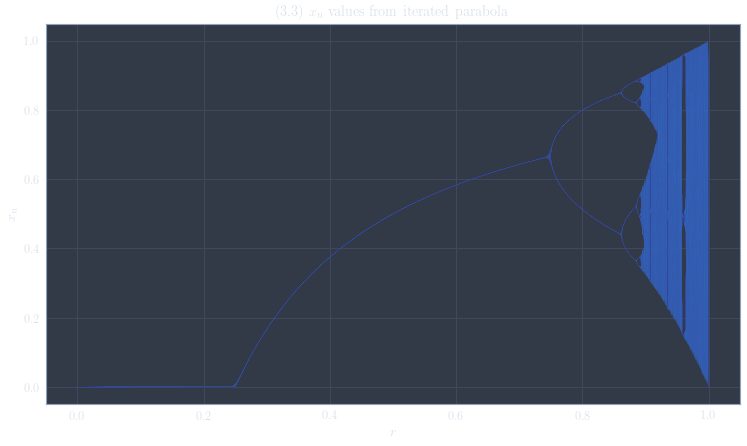

In [155]:
mp.figure(figsize=(7*16/9,7))

mp.plot(r,xn[:,100:], "b-", lw=0.02)

mp.xlabel(r"$r$")
mp.ylabel(r"$x_n$")
mp.title(r"\textrm{(3.3) $x_n$ values from iterated parabola}")
mp.show()

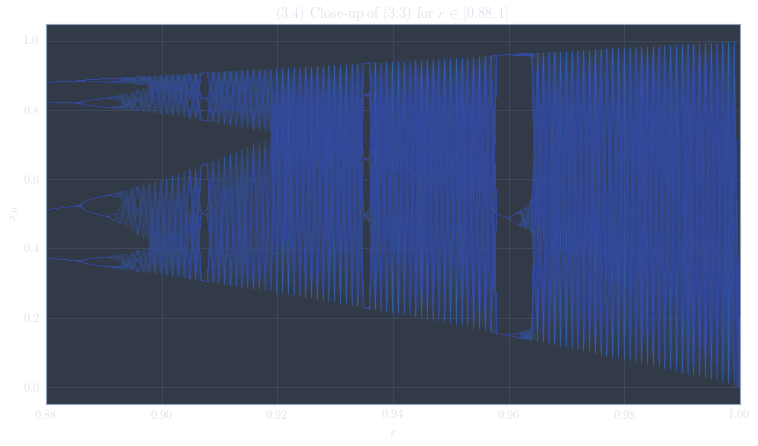

In [156]:
mp.figure(figsize=(7*16/9,7))

mp.plot(r,xn[:,100:], "b-", linewidth=0.02, aa=True)

mp.xlabel(r"$r$")
mp.ylabel(r"$x_n$")
mp.title(r"\textrm{(3.4) Close-up of (3.3) for $r \in [0.88,1]$}")
mp.xlim(0.88,1)
mp.show()

In [157]:
xn = []
r = 0.934
x = np.zeros(1000)
x[0] = 0.5
for i in range(1,1000):
    x[i] = 4*r*x[i-1]*(1-x[i-1])
xn.append(x)
xn = np.array(xn)[0]

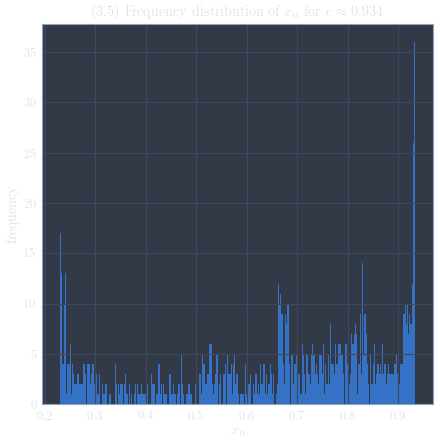

In [158]:
mp.figure(figsize=(7,7))
mp.hist(xn, bins=300)

mp.xlabel(r"$x_n$")
mp.ylabel(r"\textrm{frequency}")
mp.title(r"\textrm{(3.5) Frequency distribution of $x_n$ for $r\approx 0.934$}")
mp.show()

In [159]:
def period(n):
    if n == 1:
        return [0,1]
    else:
        return np.append(period(n-1),correct(period(n-1)))
    
def correct(li):
    li = li
    l = len(li)
    s = sum(li[1:])
    if s%2 == 1:
        li[0] = 0
    else:
        li[0] = 1
    return li

def g(n,mu):
    x = np.sqrt(mu)
    l = len(period(n))
    for i in range(l-1,1,-1):
        x = np.sqrt(mu + (-1)**(period(n)[i]) * x)
    return x

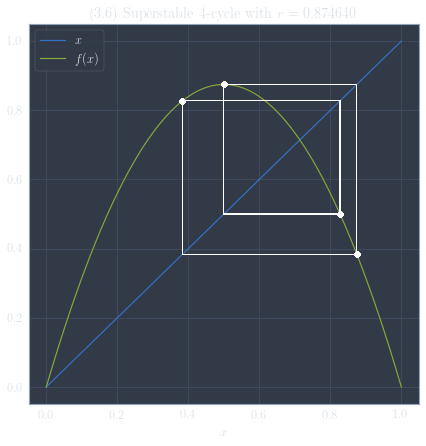

In [146]:
r = 0.874640
x = np.linspace(0,1,100)
xn = np.zeros(1000)
xn[0] = 0.5
for i in range(1,len(xn)):
    xn[i] = f(xn[i-1])

mp.figure(figsize=(7,7))

mp.plot(x,x, label=r"$x$")
mp.plot(x,f(x), label=r"$f(x)$")

mp.plot(xn,f(xn),"wo")
mp.step(xn,f(xn),"w-", where="post", lw=0.1)

mp.xlabel(r"$x$")
mp.title(r"\textrm{(3.6) Superstable 4-cycle with $r=%.6f$"%r)
mp.legend()
mp.show()

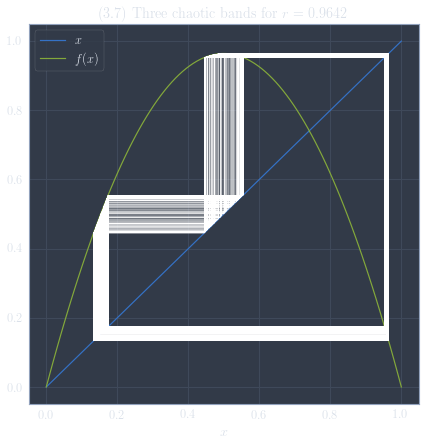

In [147]:
r = 0.9642
xn = np.zeros(1000)
xn[0] = 0.5
r = 0.9642
for n in range(1,len(xn)):
    xn[n] = f(xn[n-1])
    
x = np.linspace(0,1,100)
mp.figure(figsize=(7,7))

mp.plot(x,x, label=r"$x$")
mp.plot(x,f(x), label=r"$f(x)$")

mp.step(xn,f(xn),"w-", where="post", lw=0.1)

mp.xlabel(r"$x$")
mp.title(r"\textrm{(3.7) Three chaotic bands for $r=%.4f$"%r)
mp.legend()
mp.show()